In [1]:
import Thermobar as pt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Importing new data from my compilation

In [27]:
PW_Amp_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Amp")
PW_Amp_input=PW_Amp_in['my_input']
PW_Amp_PreFilt=PW_Amp_in['Amps']


In [52]:
PW_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=PW_Amp_PreFilt).cation_sum_All


In [155]:
PW_Cpx_in=pt.import_excel(r"C:\Users\penny\OneDrive - Oregon State University\Postdoc\PyMME\MyBarometers\LEPR_Tests\LEPR_Wet_Stitched.xlsx", sheet_name="Cpx")
PW_Cpx_input=PW_Cpx_in['my_input']
PW_Cpx_PreFilt=PW_Cpx_in['Cpxs']

a=3.95
b=4.05

PW_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=PW_Cpx_PreFilt)
PW_Cpx_Sums=PW_Cpx_cs.Cation_Sum_Cpx
PW_CaCaMgFe=PW_Cpx_cs.Ca_CaMgFe
PW_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=PW_Amp_PreFilt).cation_sum_All


PW_Cpx=PW_Cpx_PreFilt.loc[(PW_Cpx_Sums.between(a, b)) & (PW_CaCaMgFe>0.2) ]
PW_Amp=PW_Amp_PreFilt.loc[PW_Amp_Sums.between(15.5, 16)]


PW_Cpx_nosuf=PW_Cpx.copy()
PW_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in PW_Cpx_nosuf.columns]

PW_Amp_nosuf=PW_Amp.copy()
PW_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
PW_Amp_nosuf.columns = [col.replace('_Amp', '') for col in PW_Amp_nosuf.columns]


PW_Amp_nosuf['Phase']=0
PW_Cpx_nosuf['Phase']=1
PW_Combo=pd.concat([PW_Cpx_nosuf, PW_Amp_nosuf], axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
PW_Y=PW_Combo['Phase']
PW_Combo_noclass=PW_Combo.drop(columns=['Phase'])
PW_X=PW_Combo_noclass.values

## Importing LEPR data from Keith's barometry calibrations
- Amp compositions stored in LEPR_Amp
- Cpx compositions stored in Cpx_Amp, have already taken out those with Ca_CaMgFe<0.05 (e.g. Opxs that have snuck into LEPR)

In [156]:
import warnings as w
with w.catch_warnings():
    w.simplefilter('ignore')
    LEPR_Amp_in=pt.import_excel('Putirka_Amp_Cali.xlsx', sheet_name="Sheet1")
    LEPR_Amp_PreFilt=LEPR_Amp_in['Amps']
    
    LEPR_Cpx_in=pt.import_excel('Putirka_Cpx_Cali.xlsx', sheet_name="Sheet1")
    LEPR_px_input=LEPR_Cpx_in['my_input'].iloc[:1259]
    LEPR_Cpx_PreFilt=LEPR_Cpx_in['Cpxs'].iloc[:1259]

LEPR_Cpx_cs=pt.calculate_clinopyroxene_components(cpx_comps=LEPR_Cpx_PreFilt)
LEPR_Cpx_Sums=LEPR_Cpx_cs.Cation_Sum_Cpx
LEPR_CaCaMgFe=LEPR_Cpx_cs.Ca_CaMgFe
LEPR_Amp_Sums=pt.calculate_23oxygens_amphibole(amp_comps=LEPR_Amp_PreFilt).cation_sum_All


LEPR_Cpx=LEPR_Cpx_PreFilt.loc[(LEPR_Cpx_Sums.between(a, b)) & (LEPR_CaCaMgFe>0.2) ]
LEPR_Amp=LEPR_Amp_PreFilt.loc[LEPR_Amp_Sums.between(15.5, 16)]


LEPR_Cpx_nosuf=LEPR_Cpx.copy()
LEPR_Cpx_nosuf.columns = [col.replace('_Cpx', '') for col in LEPR_Cpx_nosuf.columns]

LEPR_Amp_nosuf=LEPR_Amp.copy()
LEPR_Amp_nosuf.drop(columns=['F_Amp', 'Cl_Amp'], inplace=True)
LEPR_Amp_nosuf.columns = [col.replace('_Amp', '') for col in LEPR_Amp_nosuf.columns]


LEPR_Amp_nosuf['Phase']=0
LEPR_Cpx_nosuf['Phase']=1
LEPR_Combo=pd.concat([LEPR_Cpx_nosuf, LEPR_Amp_nosuf], axis=0, ignore_index=True)#.reset_index(drop=True, inplace=True)
LEPR_Y=LEPR_Combo['Phase']
LEPR_Combo_noclass=LEPR_Combo.drop(columns=['Phase'])
LEPR_X=LEPR_Combo_noclass.values

In [157]:

print('LEPR inside filt')
sum(LEPR_Cpx_Sums.between(a, b))/len(LEPR_Cpx_Sums)

LEPR inside filt


0.9038919777601271

In [158]:
print('New inside filt')
sum(PW_Cpx_Sums.between(a, b))/len(PW_Cpx_Sums)

New inside filt


0.9599528857479388

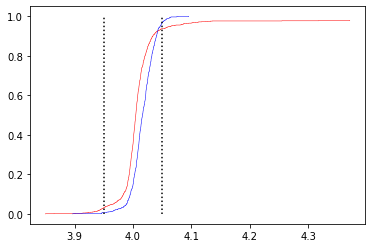

In [159]:

XShish_sorted=np.sort(LEPR_Cpx_Sums)
XShish_sorted2=np.sort(PW_Cpx_Sums)
 
plt.step(np.concatenate([XShish_sorted, XShish_sorted[[-1]]]),
         np.arange(XShish_sorted.size+1)/XShish_sorted.size, color='red', linewidth=0.5)
plt.step(np.concatenate([XShish_sorted2, XShish_sorted2[[-1]]]),
         np.arange(XShish_sorted2.size+1)/XShish_sorted2.size, color='blue', linewidth=0.5)
plt.plot([3.95, 3.95], [0, 1], ':k')
plt.plot([4.05, 4.05], [0, 1], ':k')

(array([  1.,   1.,   4.,  27.,  55., 129., 197., 108.,  35.,   2.]),
 array([14.75884294, 14.90694955, 15.05505615, 15.20316276, 15.35126936,
        15.49937597, 15.64748257, 15.79558918, 15.94369578, 16.09180238,
        16.23990899]),
 <BarContainer object of 10 artists>)

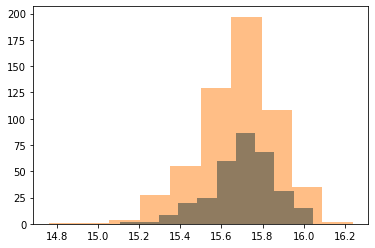

In [160]:
plt.hist(PW_Amp_Sums)
plt.hist(LEPR_Amp_Sums, alpha=0.5)

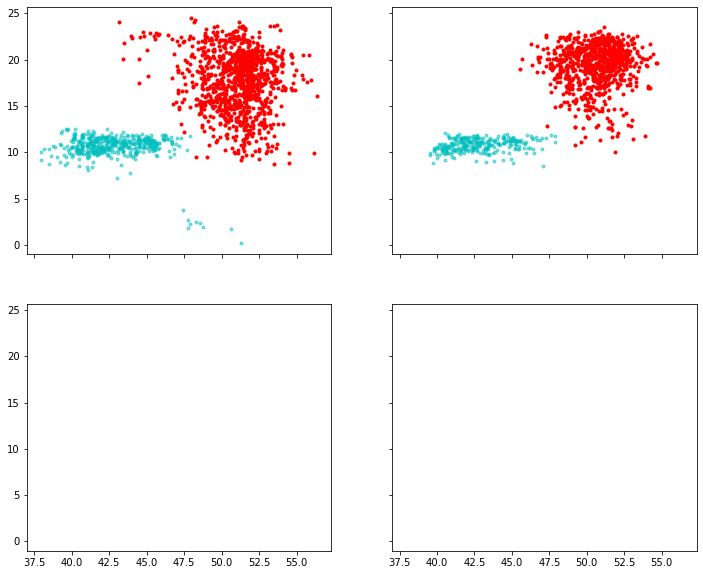

In [161]:
## Viualizing differences
fig, ((ax0, ax1), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 10), sharex=True, sharey=True)
ax0.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
ax0.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.c', alpha=0.5)

ax1.plot(PW_Cpx['SiO2_Cpx'], PW_Cpx['CaO_Cpx'], '.r')
ax1.plot(PW_Amp['SiO2_Amp'], PW_Amp['CaO_Amp'], '.c', alpha=0.5)

## Tutorial from https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

In [162]:
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

In [163]:
# In my example, 0 is amphibole, 1 is cpx. 

In [164]:
X_train=PW_X
y_train=PW_Y

X_test=LEPR_X
y_test=LEPR_Y
from sklearn.tree import DecisionTreeClassifier
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train)
dtree_predictions = dtree_model.predict(X_test)

cm = confusion_matrix(y_test, dtree_predictions)

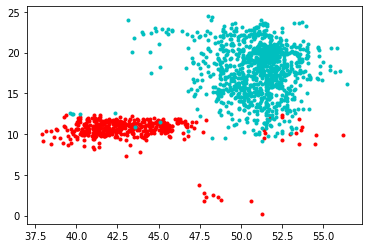

In [165]:
pred_amp_dtree=dtree_predictions==0
pred_cpx_dtree=dtree_predictions==1

plt.plot(LEPR_Combo['SiO2'].loc[pred_amp_dtree], LEPR_Combo['CaO'].loc[pred_amp_dtree], '.r')
plt.plot(LEPR_Combo['SiO2'].loc[pred_cpx_dtree], LEPR_Combo['CaO'].loc[pred_cpx_dtree], '.c')

In [166]:
cm

array([[ 443,    8],
       [  17, 1044]], dtype=int64)

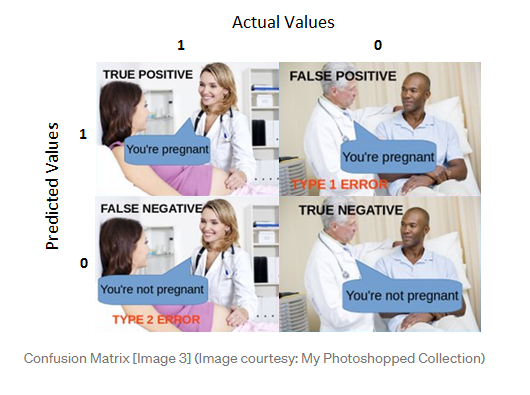

In [167]:
# dividing X, y into train and test data  
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test)
  
# model accuracy for X_test  
accuracy = svm_model_linear.score(X_test, y_test)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, svm_predictions)

In [168]:
len(LEPR_Cpx)

1061

In [169]:
# 451 amphiboles
# 1138 Clinopyroxenes
# Has currently identified all amphiboles as amphiboles, didnt allocate any to cpx
# Has misassigned 11 clinopyroxenes as amphiboles. 
cm


array([[ 451,    0],
       [   4, 1057]], dtype=int64)

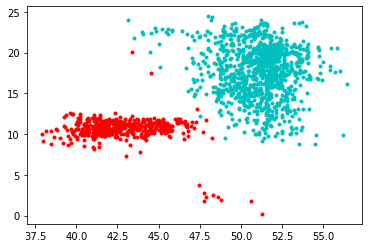

In [170]:
pred_amp_swm=svm_predictions==0
pred_cpx_swm=svm_predictions==1

plt.plot(LEPR_Combo['SiO2'].loc[pred_amp_swm], LEPR_Combo['CaO'].loc[pred_amp_swm], '.r')
plt.plot(LEPR_Combo['SiO2'].loc[pred_cpx_swm], LEPR_Combo['CaO'].loc[pred_cpx_swm], '.c')

## KNN - nearest neigbour

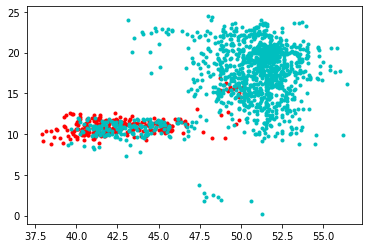

In [181]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = knn.score(X_test, y_test)

  
# creating a confusion matrix
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)

pred_amp_knn=knn_predictions==0
pred_cpx_knn=knn_predictions==1

plt.plot(LEPR_Combo['SiO2'].loc[pred_amp_knn], LEPR_Combo['CaO'].loc[pred_amp_knn], '.r')
plt.plot(LEPR_Combo['SiO2'].loc[pred_cpx_knn], LEPR_Combo['CaO'].loc[pred_cpx_knn], '.c')

# Naive Bayes classifier

In [178]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)
gnb_predictions = gnb.predict(X_test)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)
print(accuracy)
  
# creating a confusion matrix
cm = confusion_matrix(y_test, gnb_predictions)
cm

0.9821428571428571


array([[ 451,    0],
       [  27, 1034]], dtype=int64)

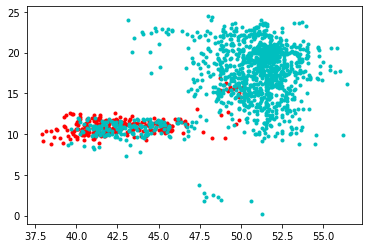

In [182]:
from sklearn.neighbors import KNeighborsClassifier
gnb = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train)
  
# accuracy on X_test
accuracy = gnb.score(X_test, y_test)

  
# creating a confusion matrix
gnb_predictions = gnb.predict(X_test) 
cm = confusion_matrix(y_test, gnb_predictions)

pred_amp_gnb=gnb_predictions==0
pred_cpx_gnb=gnb_predictions==1

plt.plot(LEPR_Combo['SiO2'].loc[pred_amp_gnb], LEPR_Combo['CaO'].loc[pred_amp_gnb], '.r')
plt.plot(LEPR_Combo['SiO2'].loc[pred_cpx_gnb], LEPR_Combo['CaO'].loc[pred_cpx_gnb], '.c')

## Cascade Mineral Data

In [83]:
## No amphiboles yet. 
Baker_read_Cpx=pt.import_excel('Baker.xlsx', sheet_name='Cpx_All')
Baker_Input_Cpx=Baker_read_Cpx['my_input']
Baker_Cpx=Baker_read_Cpx['Cpxs']
Baker_Cpx_copy=Baker_Cpx.copy()

## No amphiboles yet. 
Baker_read_Opx=pt.import_excel('Baker.xlsx', sheet_name='Opx_All')
Baker_Input_Opx=Baker_read_Opx['my_input']
Baker_Opx=Baker_read_Opx['Opxs']
Baker_Opx_copy=Baker_Opx.copy()

## No amphiboles yet. 
Baker_read_Plag=pt.import_excel('Baker.xlsx', sheet_name='Plag_All')
Baker_Input_Plag=Baker_read_Plag['my_input']
Baker_Plag=Baker_read_Plag['Plags']
Baker_Plag_copy=Baker_Plag.copy()

In [84]:
## No amphiboles yet. 
Adams_read_Cpx=pt.import_excel('Adams.xlsx', sheet_name='Cpx_All')
Adams_Input_Cpx=Adams_read_Cpx['my_input']
Adams_Cpx=Adams_read_Cpx['Cpxs']
Adams_Cpx_copy=Adams_Cpx.copy()

## No amphiboles yet. 
Adams_read_Opx=pt.import_excel('Adams.xlsx', sheet_name='Opx_All')
Adams_Input_Opx=Adams_read_Opx['my_input']
Adams_Opx=Adams_read_Opx['Opxs']
Adams_Opx_copy=Adams_Opx.copy()

In [85]:
Rainier_read_Cpx=pt.import_excel('Rainier.xlsx', sheet_name='Cpx_All')
Rainier_Input_Cpx=Rainier_read_Cpx['my_input']
Rainier_Cpx=Rainier_read_Cpx['Cpxs']
Rainier_Cpx_copy=Rainier_Cpx.copy()

Rainier_read_Amp=pt.import_excel('Rainier.xlsx', sheet_name='Amp_All')
Rainier_Input_Amp=Rainier_read_Amp['my_input']
Rainier_Amp=Rainier_read_Amp['Amps']
Rainier_Amp_copy=Rainier_Amp.copy()

Rainier_read_Opx=pt.import_excel('Rainier.xlsx', sheet_name='Opx_All')
Rainier_Input_Opx=Rainier_read_Opx['my_input']
Rainier_Opx=Rainier_read_Opx['Opxs']
Rainier_Opx_copy=Rainier_Opx.copy()

In [86]:
Lassen_read_Cpx=pt.import_excel('Lassen.xlsx', sheet_name='Cpx_All')
Lassen_Input_Cpx=Lassen_read_Cpx['my_input']
Lassen_Cpx=Lassen_read_Cpx['Cpxs']
Lassen_Cpx_copy=Lassen_Cpx.copy()

Lassen_read_Amp=pt.import_excel('Lassen.xlsx', sheet_name='Amp_All')
Lassen_Input_Amp=Lassen_read_Amp['my_input']
Lassen_Amp=Lassen_read_Amp['Amps']
Lassen_Amp_copy=Lassen_Amp.copy()


In [87]:
Baker_Cpx

,SiO2_Cpx,TiO2_Cpx,Al2O3_Cpx,FeOt_Cpx,MnO_Cpx,MgO_Cpx,CaO_Cpx,Na2O_Cpx,K2O_Cpx,Cr2O3_Cpx,Sample_ID_Cpx
0,52.22,0.5007,3.5300,5.32,0.1401,16.67,21.67,0.2527,0.0,0.2984,TP3_cpx1-1
1,52.46,0.3527,2.5085,4.36,0.0958,16.78,22.28,0.2396,0.0,0.5776,TP3_cpx1-2
2,50.74,1.0913,2.0027,11.62,0.2940,15.05,18.08,0.3272,0.0,0.0136,TP3_cpx2
3,51.33,0.5243,2.5074,5.90,0.1708,16.07,21.20,0.2248,0.0,0.1629,TP4_cpx1-1
4,51.78,0.4274,1.7926,7.91,0.2242,15.45,21.04,0.3433,0.0,0.0228,TP4_cpx1-2
...,...,...,...,...,...,...,...,...,...,...,...
98,54.04,0.2990,0.8385,9.92,0.4618,13.92,20.55,0.3657,0.0,0.0000,BG-3TB CpxAc
99,53.05,0.4280,1.2284,10.05,0.3430,13.98,20.76,0.3613,0.0,0.0000,BG-3TB CpxBc
100,50.70,0.5747,1.6429,10.43,0.3332,13.86,19.63,0.3762,0.0,0.0035,BG-7TB CpxBc
101,52.76,0.4492,1.2692,9.29,0.4279,14.29,20.81,0.3729,0.0,0.0000,BG-7TB CpxCc


In [88]:
Cpx_combine=pd.concat([Rainier_Cpx, Baker_Cpx, Adams_Cpx, Lassen_Cpx], axis=0, ignore_index=True)
Opx_combine=pd.concat([Rainier_Opx, Baker_Opx, Adams_Opx], axis=0, ignore_index=True)
Plag_combine=pd.concat([Baker_Plag], axis=0, ignore_index=True)
Amp_combine=pd.concat([Rainier_Amp, Lassen_Amp], axis=0, ignore_index=True)

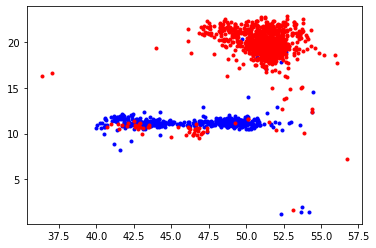

In [92]:
plt.plot(Amp_combine['SiO2_Amp'],Amp_combine['CaO_Amp'], '.b')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '.r')


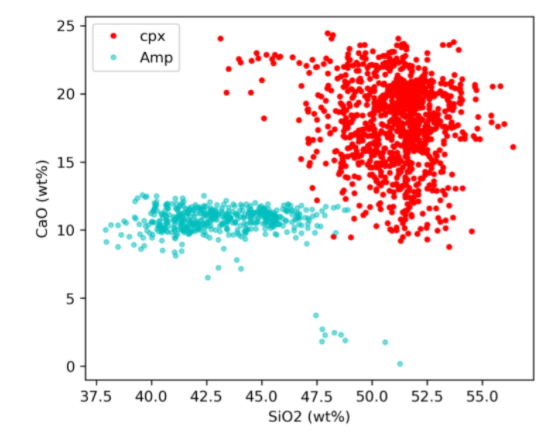

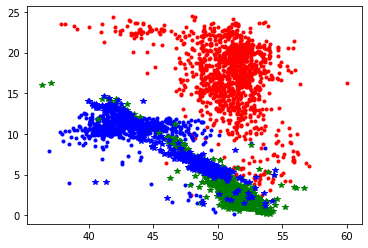

In [62]:
plt.plot(LEPR_Cpx['SiO2_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(LEPR_Amp['SiO2_Amp'], LEPR_Amp['CaO_Amp'], '.b')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Al2O3_Cpx'], '*g')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Al2O3_Amp'], '*b')


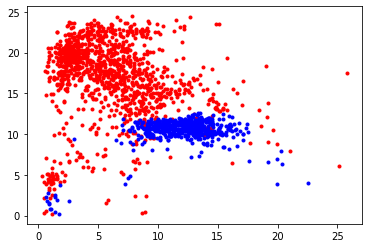

In [39]:
plt.plot(LEPR_Cpx['Al2O3_Cpx'], LEPR_Cpx['CaO_Cpx'], '.r')
plt.plot(LEPR_Amp['Al2O3_Amp'], LEPR_Amp['CaO_Amp'], '.b')


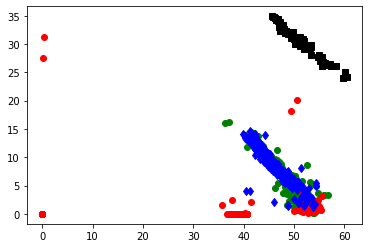

In [21]:
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Al2O3_Cpx'], 'og')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['Al2O3_Opx'], 'or')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Al2O3_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['Al2O3_Plag'], 'sk')

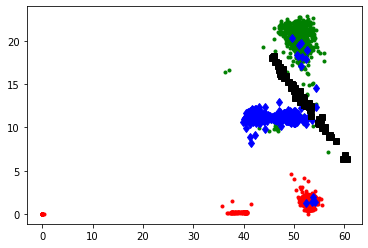

In [22]:
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['CaO_Cpx'], '.g')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['CaO_Opx'], '.r')
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['CaO_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['CaO_Plag'], 'sk')

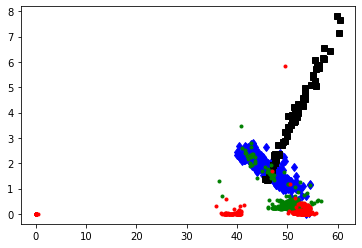

In [24]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Na2O_Amp'], 'db')
plt.plot(Plag_combine['SiO2_Plag'], Plag_combine['Na2O_Plag'], 'sk')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Na2O_Cpx'], '.g')
plt.plot(Opx_combine['SiO2_Opx'], Opx_combine['Na2O_Opx'], '.r')


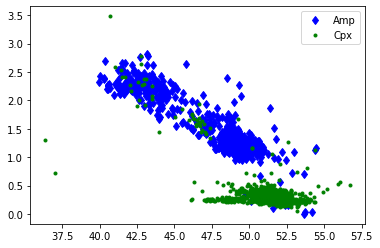

In [26]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['Na2O_Amp'], 'db', label='Amp')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['Na2O_Cpx'], '.g', label='Cpx')
plt.legend()


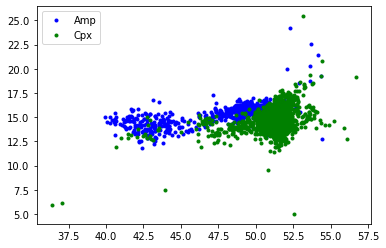

In [29]:
plt.plot(Amp_combine['SiO2_Amp'], Amp_combine['MgO_Amp'], '.b', label='Amp')
plt.plot(Cpx_combine['SiO2_Cpx'], Cpx_combine['MgO_Cpx'], '.g', label='Cpx')
plt.legend()


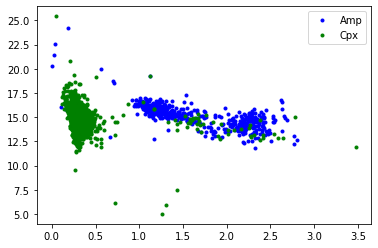

In [30]:
plt.plot(Amp_combine['Na2O_Amp'], Amp_combine['MgO_Amp'], '.b', label='Amp')
plt.plot(Cpx_combine['Na2O_Cpx'], Cpx_combine['MgO_Cpx'], '.g', label='Cpx')
plt.legend()
